In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

here we have got xlxs file and we will convert this xlxs file into csv file

In [2]:
df = pd.read_excel('classified data.xlsx', index_col=None)
df.to_csv('classified data.csv', encoding='utf-8')


here we have classified data which is not scaled so we will do scaling of this data

In [3]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [5]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

here we scale all the feature columns  except last column as this is y factor

In [6]:
sc.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scale_feature_cols=sc.transform(df.drop('TARGET CLASS',axis=1))

after we get scaled data we will transform this data into dataframe in order to build and train Model

In [8]:
df_feat_cols=pd.DataFrame(data=scale_feature_cols,columns=df.columns[:-1])

In [9]:
X=df_feat_cols
y=df['TARGET CLASS']

In [10]:
print(X.head())
print((y).head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510  
0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64


In [11]:
from sklearn.cross_validation import train_test_split


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.33)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
predictions=knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("-------------------------------")

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       173
          1       0.95      0.89      0.92       157

avg / total       0.93      0.92      0.92       330

[[165   8]
 [ 17 140]]
-------------------------------


here we get a f1-score is 0.92 so we will try to make more accurarcy 

In KNN algo our predictted values depends on the k values  so we will visulaize the low error rate for data points with the k values

In [18]:
error_rate=[]
for i in range(1,40):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred=knn.predict(X_test)
        error_rate.append(np.mean(pred!=y_test))
    

now we will visualize k values  with respective data points predicted

Text(0.5,1,'error_rate v/s values')

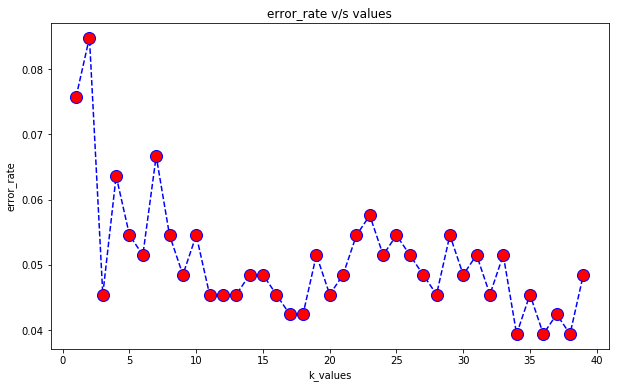

In [19]:
fig=plt.figure()
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.xlabel('k_values')
plt.ylabel('error_rate')
plt.title('error_rate v/s values')

so here we can see the values for k we will get low error rate at k=17,34,36,37,38) 

In [20]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       173
          1       0.97      0.94      0.95       157

avg / total       0.96      0.96      0.96       330

[[168   5]
 [  9 148]]
